In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/filtered_data_northern_vietnam.csv')

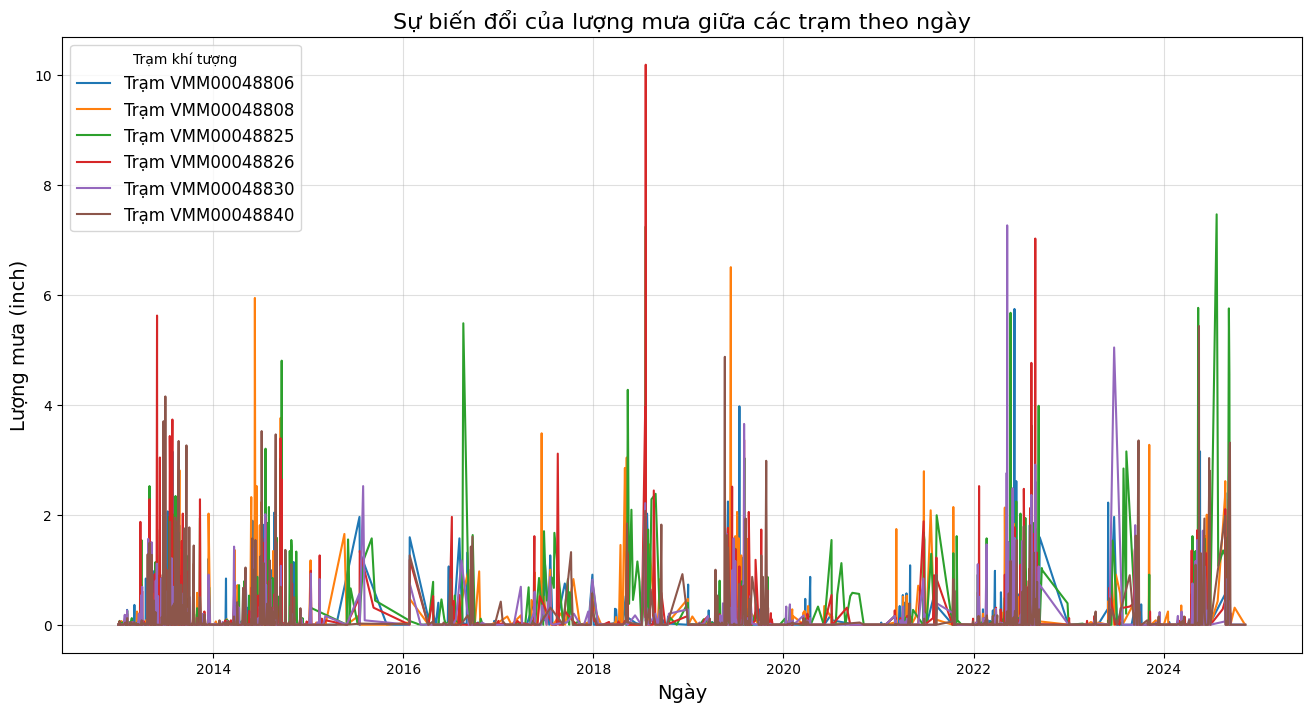

In [ ]:
# Chuyển cột DATE thành định dạng datetime nếu chưa
df['DATE'] = pd.to_datetime(df['DATE'])

# Nhóm dữ liệu theo DATE và STATION, tính trung bình lượng mưa
station_daily_prcp = df.groupby(['DATE', 'STATION'])['PRCP'].mean().reset_index()

# Vẽ biểu đồ line plot cho từng trạm
plt.figure(figsize=(16, 8))

# Lặp qua từng trạm để vẽ đường
for station in station_daily_prcp['STATION'].unique():
    station_data = station_daily_prcp[station_daily_prcp['STATION'] == station]
    plt.plot(station_data['DATE'], station_data['PRCP'], label=f"Trạm {station}")

# Tùy chỉnh biểu đồ
plt.title("Sự biến đổi của lượng mưa giữa các trạm theo ngày", fontsize=16)
plt.xlabel("Ngày", fontsize=14)
plt.ylabel("Lượng mưa (inch)", fontsize=14)
plt.legend(title="Trạm khí tượng", fontsize=12)
plt.grid(alpha=0.4)
plt.show()


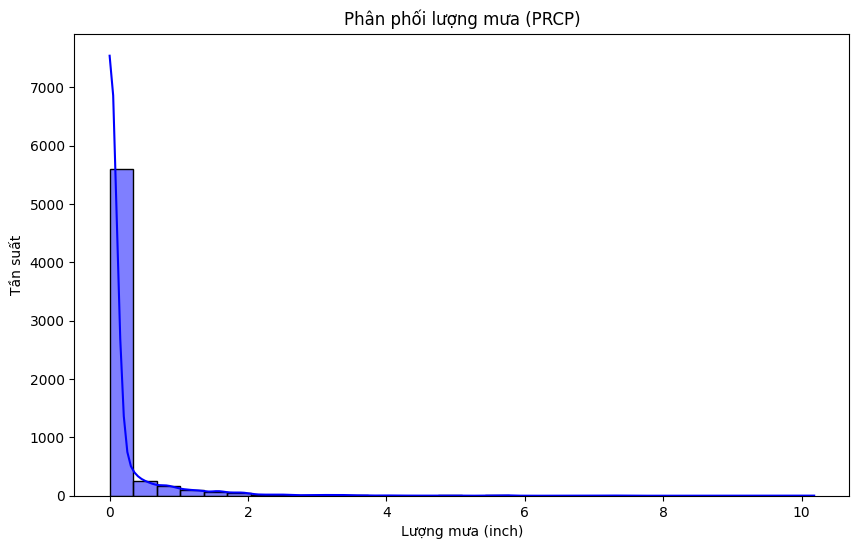

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(df['PRCP'], bins=30, kde=True, color="blue")
plt.title("Phân phối lượng mưa (PRCP)")
plt.xlabel("Lượng mưa (inch)")
plt.ylabel("Tần suất")
plt.show()

Thống kê lượng mưa tổng cộng cho các ngày có mưa:
count    1169.000000
mean        1.048512
std         1.704622
min         0.010000
25%         0.070000
50%         0.350000
75%         1.340000
max        18.060000
Name: PRCP, dtype: float64


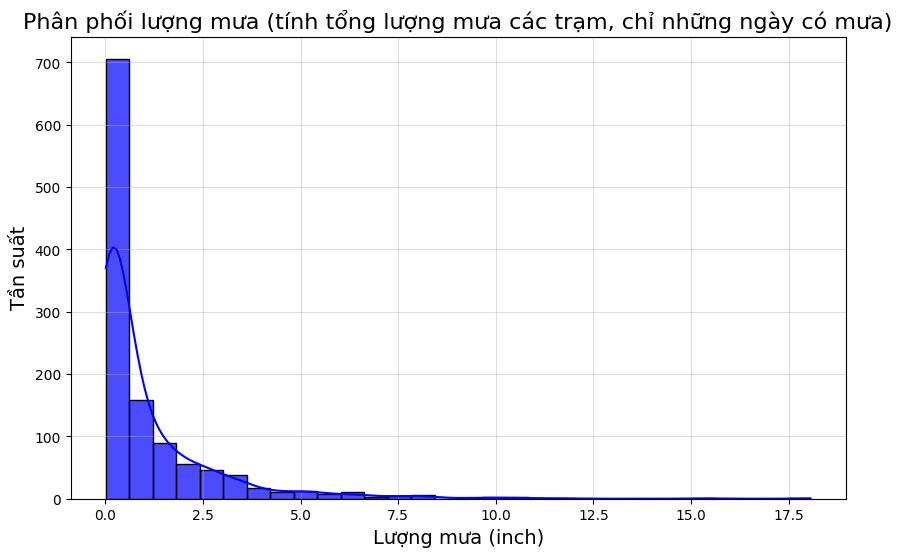

In [5]:
# Chuyển cột DATE thành định dạng datetime nếu chưa
df['DATE'] = pd.to_datetime(df['DATE'])

# Nhóm dữ liệu theo DATE và tính tổng lượng mưa trong ngày (hoặc trung bình nếu muốn)
daily_rainfall = df.groupby('DATE')['PRCP'].sum().reset_index()

# Lọc những ngày có mưa (tổng lượng mưa > 0)
rainy_days = daily_rainfall[daily_rainfall['PRCP'] > 0]

# Kiểm tra thống kê cơ bản sau khi nhóm
print("Thống kê lượng mưa tổng cộng cho các ngày có mưa:")
print(rainy_days['PRCP'].describe())

# ----------------------------------------
# Lập biểu đồ phân phối
# ----------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(rainy_days['PRCP'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title("Phân phối lượng mưa (tính tổng lượng mưa các trạm, chỉ những ngày có mưa)", fontsize=16)
plt.xlabel("Lượng mưa (inch)", fontsize=14)
plt.ylabel("Tần suất", fontsize=14)
plt.grid(alpha=0.4)
plt.show()


Tổng lượng mưa hàng năm (dựa trên trung bình hàng ngày):
    YEAR       PRCP
0   2013  61.630333
1   2014  62.531667
2   2015  15.686667
3   2016  21.454000
4   2017  27.511000
5   2018  37.595000
6   2019  38.597000
7   2020   7.157000
8   2021  18.543000
9   2022  57.485500
10  2023  24.242333
11  2024  48.616500


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_30456\2941077809.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YEAR', y='PRCP', data=annual_rainfall, palette="Blues_d")


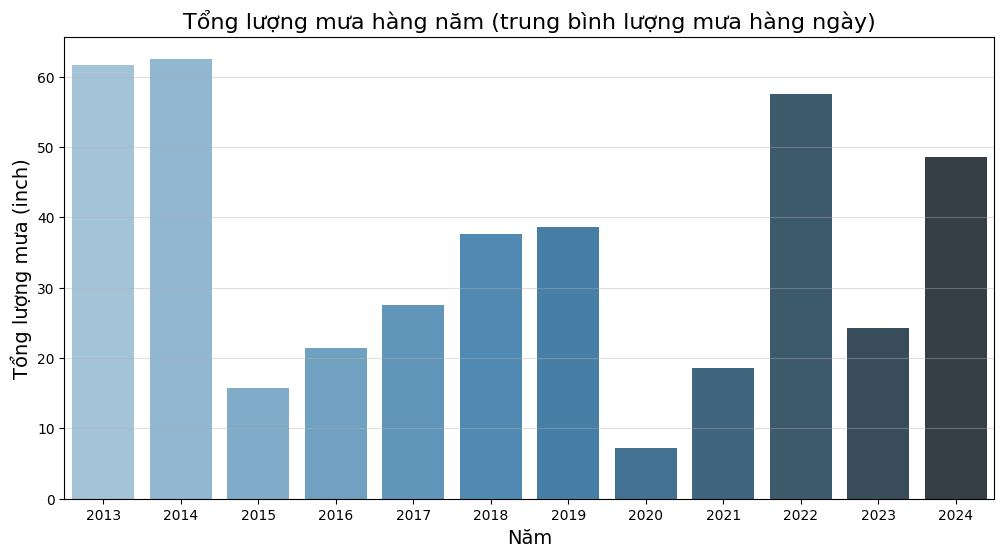

: 

In [ ]:
# Chuyển cột DATE thành datetime nếu chưa
df['DATE'] = pd.to_datetime(df['DATE'])

# Tạo cột YEAR từ DATE
df['YEAR'] = df['DATE'].dt.year

# Nhóm dữ liệu theo ngày và tính trung bình lượng mưa từ các trạm
daily_avg_rainfall = df.groupby('DATE')['PRCP'].mean().reset_index()

# Thêm cột YEAR vào dữ liệu trung bình hàng ngày
daily_avg_rainfall['YEAR'] = daily_avg_rainfall['DATE'].dt.year

# Tính tổng lượng mưa hàng năm
annual_rainfall = daily_avg_rainfall.groupby('YEAR')['PRCP'].sum().reset_index()

# Hiển thị kết quả
print("Tổng lượng mưa hàng năm (dựa trên trung bình hàng ngày):")
print(annual_rainfall)

# ----------------------------------------
# Trực quan hóa tổng lượng mưa hàng năm
# ----------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(x='YEAR', y='PRCP', data=annual_rainfall, palette="Blues_d")
plt.title("Tổng lượng mưa hàng năm (trung bình lượng mưa hàng ngày)", fontsize=16)
plt.xlabel("Năm", fontsize=14)
plt.ylabel("Tổng lượng mưa (inch)", fontsize=14)
plt.grid(axis='y', alpha=0.4)
plt.show()


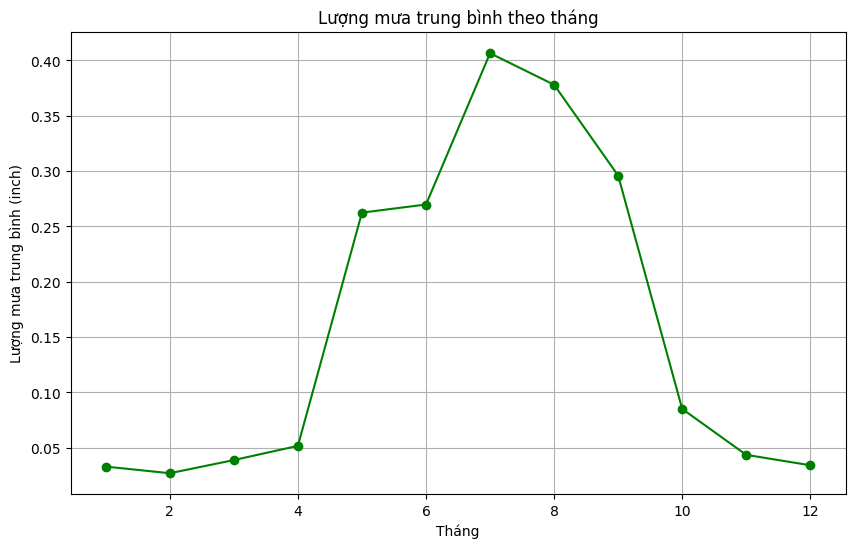

In [4]:
monthly_avg_prcp = df.groupby('MONTH')['PRCP'].mean()
plt.figure(figsize=(10, 6))
monthly_avg_prcp.plot(kind='line', marker='o', color='green')
plt.title("Lượng mưa trung bình theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Lượng mưa trung bình (inch)")
plt.grid()
plt.show()

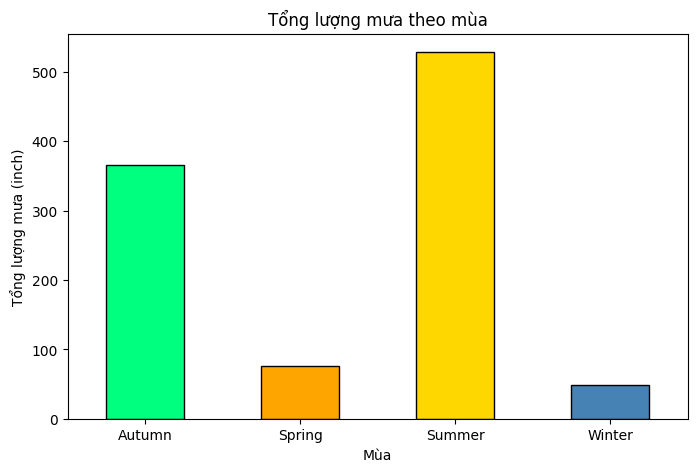

In [5]:
seasonal_prcp = df.groupby('SEASON')['PRCP'].sum()
plt.figure(figsize=(8, 5))
seasonal_prcp.plot(kind='bar', color=['springgreen', 'orange', 'gold', 'steelblue'], edgecolor='black')
plt.title("Tổng lượng mưa theo mùa")
plt.xlabel("Mùa")
plt.ylabel("Tổng lượng mưa (inch)")
plt.xticks(rotation=0)
plt.show()

In [6]:
max_prcp_row = df.loc[df['PRCP'].idxmax()]
print("\nNgày có lượng mưa cao nhất:")
print(max_prcp_row)



Ngày có lượng mưa cao nhất:
Unnamed: 0          13594
DATE           2018-07-21
STATION       VMM00048826
TMAX                   77
TMIN                   75
PRCP                10.18
YEAR                 2018
MONTH                   7
SEASON             Summer
Name: 3206, dtype: object


In [7]:
rainy_days = df[df['PRCP'] > 0]
rainy_percentage = (len(rainy_days) / len(df)) * 100
print(f"\nTần suất ngày mưa (PRCP > 0): {rainy_percentage:.2f}%")


Tần suất ngày mưa (PRCP > 0): 33.24%


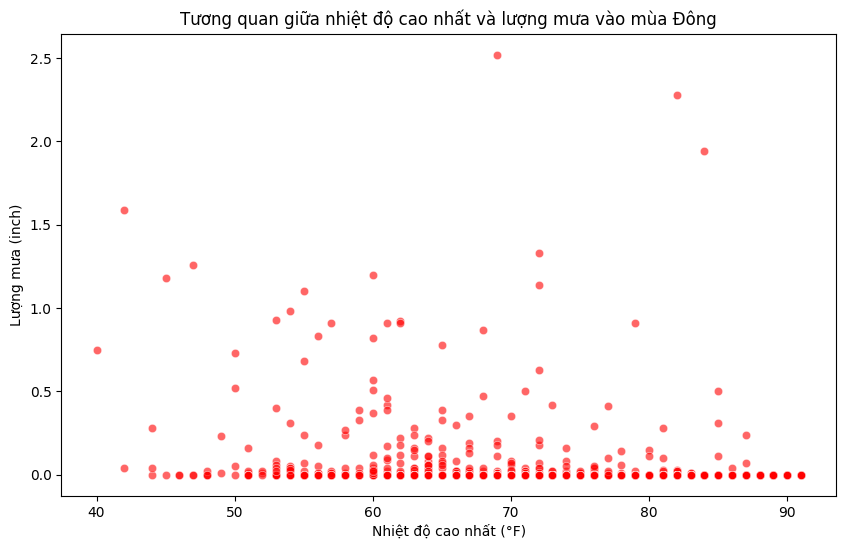

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TMAX', y='PRCP', data=df[df['SEASON'] == 'Winter'], color='red', alpha=0.6)
plt.title("Tương quan giữa nhiệt độ cao nhất và lượng mưa vào mùa Đông")
plt.xlabel("Nhiệt độ cao nhất (°F)")
plt.ylabel("Lượng mưa (inch)")
plt.show()